# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [11]:
url = "https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q="
for city in cities:
    print(url+city)    

https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=allapalli
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=taiohae
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=utrik
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=chonchi
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=port-aux-francais
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=soavinandriana
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=ribeira grande
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=adamstown
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [132]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    
    # Create endpoint URL with each city
    city_url = url+city
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_data = requests.get(city_url).json()
        print(city_weather_data )
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_data['coord']['lat']
        city_lng = city_weather_data['coord']['lon']
        city_max_temp = city_weather_data['main']['temp_max']
        city_humidity = city_weather_data['main']['humidity']
        city_clouds = city_weather_data['clouds']['all']
        city_wind = city_weather_data['wind']['speed']
        city_country = city_weather_data['sys']['country']
        city_date = city_weather_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=allapalli
Processing Record 1 of Set 1 | allapalli
{'coord': {'lon': 80.0667, 'lat': 19.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.74, 'feels_like': 53.31, 'temp_min': 55.74, 'temp_max': 55.74, 'pressure': 1014, 'humidity': 49, 'sea_level': 1014, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 2.77, 'deg': 10, 'gust': 2.15}, 'clouds': {'all': 97}, 'dt': 1734047475, 'sys': {'country': 'IN', 'sunrise': 1734051893, 'sunset': 1734091394}, 'timezone': 19800, 'id': 1278987, 'name': 'Allāpalli', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=8f30d54436ce3b2bdd1da4df7d0f9d87&units=imperial&q=taiohae
Processing Record 2 of Set 1 | taiohae
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...

In [136]:
city_weather_data={'coord': {'lon': -73.6167, 'lat': -43.1167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 44.71, 'feels_like': 43.57, 'temp_min': 44.71, 'temp_max': 44.71, 'pressure': 1018, 'humidity': 81, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 258, 'gust': 3.27}, 'clouds': {'all': 23}, 'dt': 1733806540, 'sys': {'country': 'CL', 'sunrise': 1733821722, 'sunset': 1733876793}, 'timezone': -10800, 'id': 3874943, 'name': 'Quellón', 'cod': 200}
city_weather_data['dt']

1733806540

In [138]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [140]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,allapalli,19.4167,80.0667,55.74,49,97,2.77,IN,1734047475
1,utrik,11.2278,169.8474,81.72,79,29,22.50,MH,1734047477
2,chonchi,-42.6128,-73.8092,59.13,81,66,4.16,CL,1734047478
3,port-aux-francais,-49.3500,70.2167,41.04,83,83,30.53,TF,1734047480
4,soavinandriana,-19.1667,46.7333,60.28,89,6,5.23,MG,1734047481


In [142]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [144]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allapalli,19.4167,80.0667,55.74,49,97,2.77,IN,1734047475
1,utrik,11.2278,169.8474,81.72,79,29,22.50,MH,1734047477
2,chonchi,-42.6128,-73.8092,59.13,81,66,4.16,CL,1734047478
3,port-aux-francais,-49.3500,70.2167,41.04,83,83,30.53,TF,1734047480
4,soavinandriana,-19.1667,46.7333,60.28,89,6,5.23,MG,1734047481


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

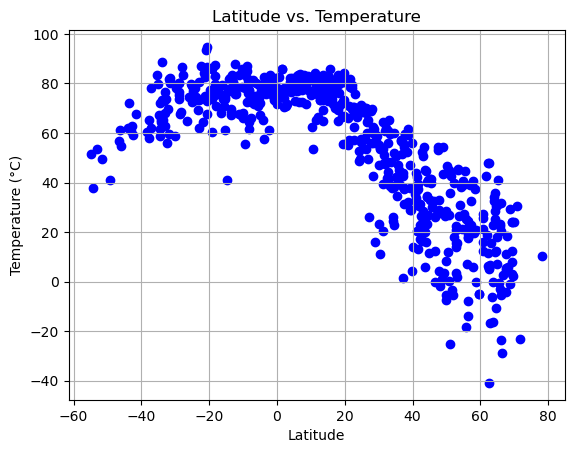

In [147]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.grid(True)
plt.show()


#### Latitude Vs. Humidity

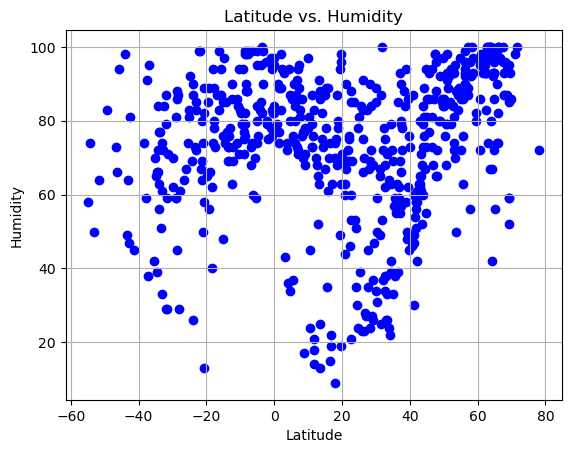

In [150]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

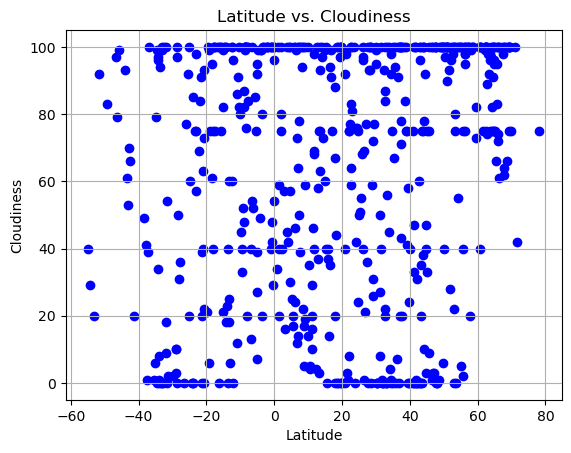

In [153]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

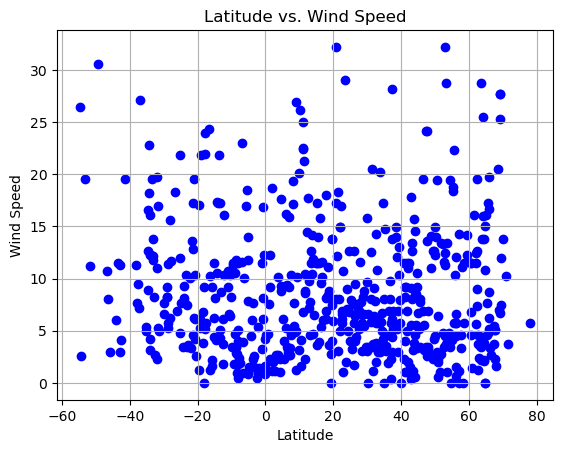

In [156]:
# Build the scatter plots for latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [159]:
# Define a function to create Linear Regression plot
def plot_linear_regression(x, y, xlabel='X', ylabel='Y', title='Linear Regression Plot'):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)

In [161]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allapalli,19.4167,80.0667,55.74,49,97,2.77,IN,1734047475
1,utrik,11.2278,169.8474,81.72,79,29,22.50,MH,1734047477
5,ribeira grande,38.5167,-28.7000,61.77,84,84,14.00,PT,1734047482
7,lazaro cardenas,17.9583,-102.2000,81.75,70,0,8.12,MX,1734047484
8,iqaluit,63.7506,-68.5145,22.73,67,75,28.77,CA,1734047485


In [163]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chonchi,-42.6128,-73.8092,59.13,81,66,4.16,CL,1734047478
3,port-aux-francais,-49.3500,70.2167,41.04,83,83,30.53,TF,1734047480
4,soavinandriana,-19.1667,46.7333,60.28,89,6,5.23,MG,1734047481
6,adamstown,-25.0660,-130.1015,72.48,81,100,11.99,PN,1734047188
12,west island,-12.1568,96.8225,78.78,69,96,10.36,CC,1734047490


###  Temperature vs. Latitude Linear Regression Plot

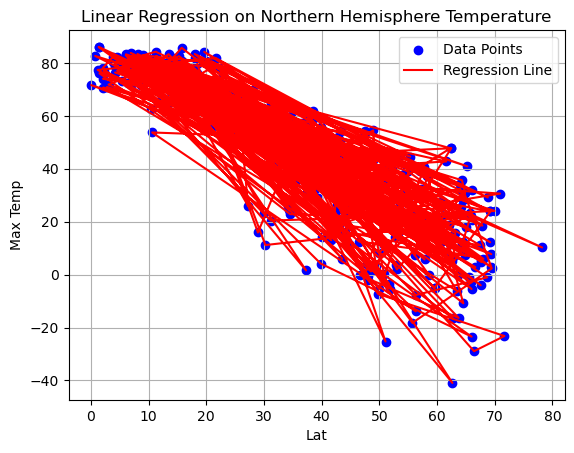

In [224]:
# Linear regression on Northern Hemisphere
x = northern_hemisphere_data['Lat'].values
y = northern_hemisphere_data['Max Temp'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Linear Regression on Northern Hemisphere Temperature')
plt.legend()
plt.grid()
plt.show()

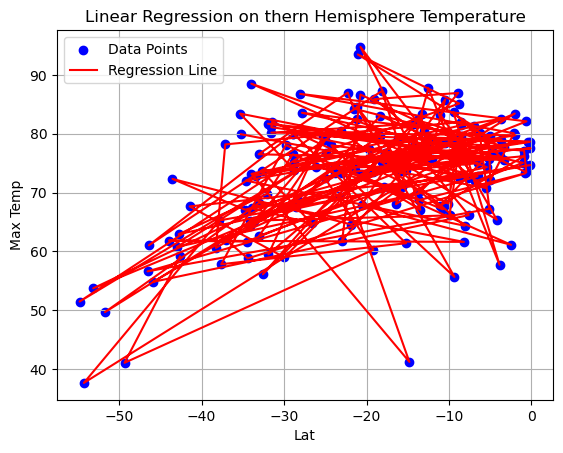

In [226]:
# Linear regression on Southern Hemisphere
x = southern_hemisphere_data['Lat'].values
y = southern_hemisphere_data['Max Temp'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Linear Regression on thern Hemisphere Temperature')
plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** It appears the northern hemisphere's regression plot decreasing as the latitude increases in temperature while southern hemisphere is increasing in temperature as the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

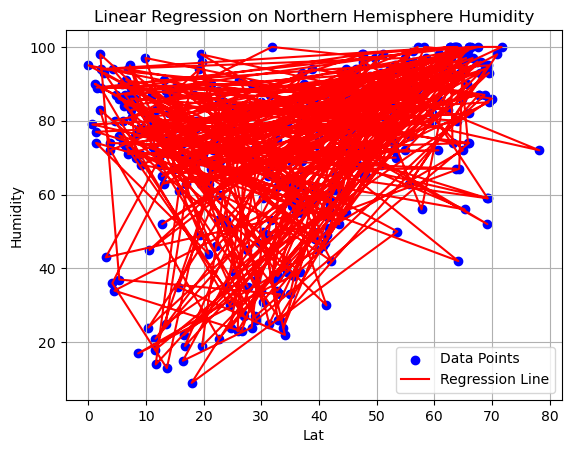

In [230]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat'].values
y = northern_hemisphere_data['Humidity'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Linear Regression on Northern Hemisphere Humidity')
plt.legend()
plt.grid()
plt.show()

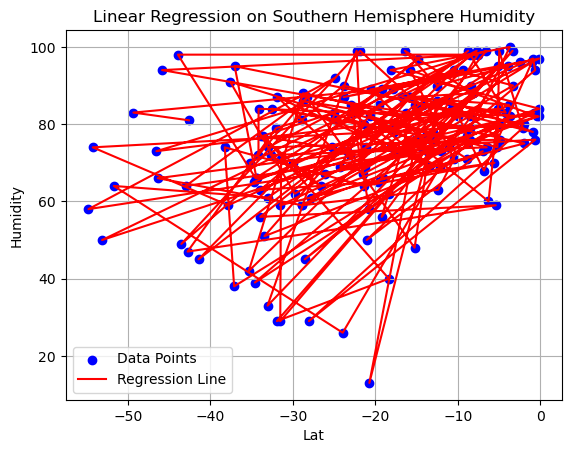

In [232]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat'].values
y = southern_hemisphere_data['Humidity'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Linear Regression on Southern Hemisphere Humidity')
plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the both the humidity increases as the latitude increases. In the southern hemisphere, the humidity increases as the latitdue increases as well.

### Cloudiness vs. Latitude Linear Regression Plot

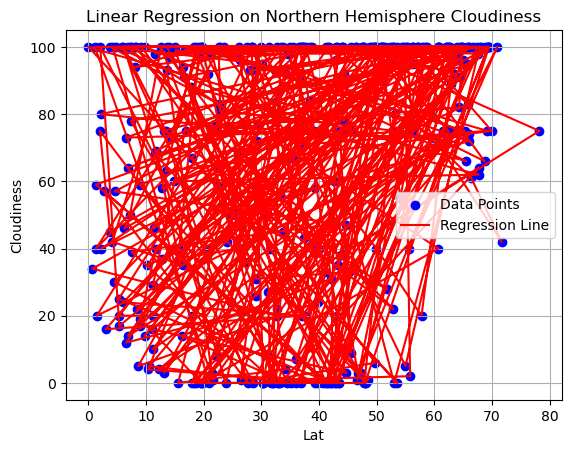

In [236]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat'].values
y = northern_hemisphere_data['Cloudiness'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Northern Hemisphere Cloudiness')
plt.legend()
plt.grid()
plt.show()

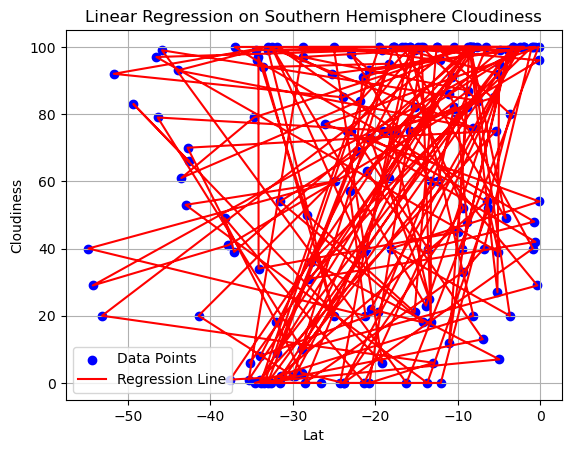

In [238]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat'].values
y = southern_hemisphere_data['Cloudiness'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Southern Hemisphere Cloudiness')
plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the cloudiness decreases as the latitude increases. In the southern hemisphere, the cloudines increases as the latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

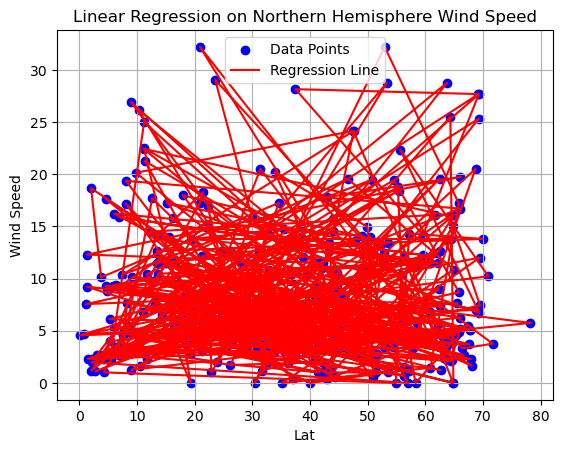

In [242]:
# Northern Hemisphere
x = northern_hemisphere_data['Lat'].values
y = northern_hemisphere_data['Wind Speed'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Northern Hemisphere Wind Speed')
plt.legend()
plt.grid()
plt.show()

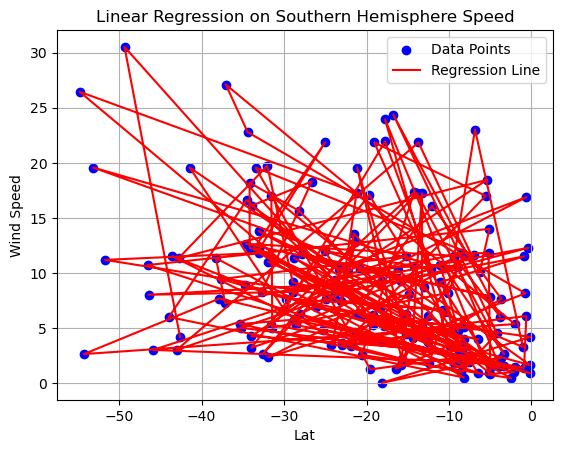

In [244]:
# Southern Hemisphere
x = southern_hemisphere_data['Lat'].values
y = southern_hemisphere_data['Wind Speed'].values


plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Regression Line')
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere Speed')
plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the lower the wind speed gets the latitude stays the same. In the southern hemisphere, the wind speed decreases as the latitude levels increases.